<!-- #Here is my new ML Project based on Stock price of S and P.
#Different ML models will be used for data analysis and visualization.
#Programming Language: Python
#IDE: VSCode
#Dataset: Sand P500.csv (Kaggle.com)
 -->


In [1]:
#Import all the important libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor, DMatrix, train
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

<!-- 1. Understanding the data set and cleaning the dataset -->

In [2]:
#Check the rows, columns, datatypes of the dataset

df=pd.read_csv(".\sp500_companies.csv")

#Here we can get the general view of the dataset
print(df.head())
print(df.info())
print(df.columns)
#check the column name data types. Here is an example of Current price
print(df.Currentprice.dtype)

print(df.Currentprice.duplicated())


  Exchange Symbol              Shortname               Longname   
0      NMS   AAPL             Apple Inc.             Apple Inc.  \
1      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
2      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
3      NMS   AMZN       Amazon.com, Inc.       Amazon.com, Inc.   
4      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice   
0              Technology            Consumer Electronics        247.77  \
1              Technology                  Semiconductors        135.07   
2              Technology       Software - Infrastructure        443.33   
3       Consumer Cyclical                 Internet Retail        225.04   
4  Communication Services  Internet Content & Information        185.17   

       Marketcap        Ebitda  Revenuegrowth           City State   
0  3745241628672  1.346610e+11          0.061      Cupertino    CA  \
1  330

Basic Operations performed: 
Calculate the important values of Mean, median, Mode
1. Mean- The average Value of the current price, 
2. Median- The midpoint value of the current price, 
3. Mode: The most common value of the current price  
4. Standard Deviation: A number that describes how spread out the values of the current price.

<!-- # Calculate the important values of Mean, median, Mode
1. Mean- The average Value, 
2. Median- The midpoint value, 
3. Mode: The most common value  
4. Standard Deviation: A number that describes how spread out the values.-->

In [3]:
#Mean of the current price in the S and P dataset

Mean=df['Currentprice'].mean()
#The average of the S and P 500 share price
print('Mean=',Mean)

# The median of the S and P 500 share price
Median=df['Currentprice'].median()
print('Median=',Median)

# The Mode of the S and P 500 share price
Mode=df['Currentprice'].mode()
print('Mode=',Mode)

#The standard deviation of the Current price of the S and P dataset
Std=df['Currentprice'].std()
print('Standard Deviation=',Std)

Mean= 227.39732604373756
Median= 126.61
Mode= 0     31.44
1     82.78
2     88.55
3    157.00
Name: Currentprice, dtype: float64
Standard Deviation= 514.9047750895471


Machine Learning Models
Linear regression. Lets check if there is a positive relation between Current price and Marketcap.

<!-- Linear regression of the  S and P dataset 
In order to test out linear regression lets check slope, 
-->

In [4]:
current_price=df['Currentprice']
Market_cap=df['Marketcap']
slope,intercept, r, p, std_err=stats.linregress(current_price,Market_cap)
print('Slope=',slope)
print('intercept=',intercept)
print('r=',r)
print("p=",p)
print("std_err=",std_err)




Slope= 28922639.682909288
intercept= 105655013664.99385
r= 0.04374713457372406
p= 0.32749414858810966
std_err= 29508930.87269322


Let us check if this model is appropriate to relation between Current price and market cap.

In [5]:
#Polynomial Regression
current_price=df['Currentprice']
Market_cap=df['Marketcap']
poly_model=np.poly1d(np.polyfit(current_price,Market_cap,3))
print("Polynomial Regression r2 score=", r2_score(Market_cap, poly_model(current_price)))

Polynomial Regression r2 score= 0.021303165069150976


Predicting the market capitalization based on current price and sector using linear regression and Label Encoding.

In [6]:
label_encoder=LabelEncoder()
df['Sector']=label_encoder.fit_transform(df['Sector'])
X=df[['Currentprice','Sector']]
Y=df['Marketcap']
model=linear_model.LinearRegression()
model.fit(X,Y)
v1=247.77
v2=3

prediction=pd.DataFrame([[v1,v2]],columns=['Currentprice','Sector'])
prediction_ans=model.predict(prediction)
df['Sector']=label_encoder.inverse_transform(df['Sector'])
decoded=label_encoder.inverse_transform([v2])[0]
print(f"The predicted market price for the current price of {v1} in the {decoded} industry is: {int(prediction_ans)}")


The predicted market price for the current price of 247.77 in the Consumer Defensive industry is: 117384999203


Visualizing the market share distribution of the top 5 technology companies based on market capitalization sector using a pie chart.

<Axes: title={'center': 'Market Share of Top Technology Companies'}, ylabel='Marketcap'>

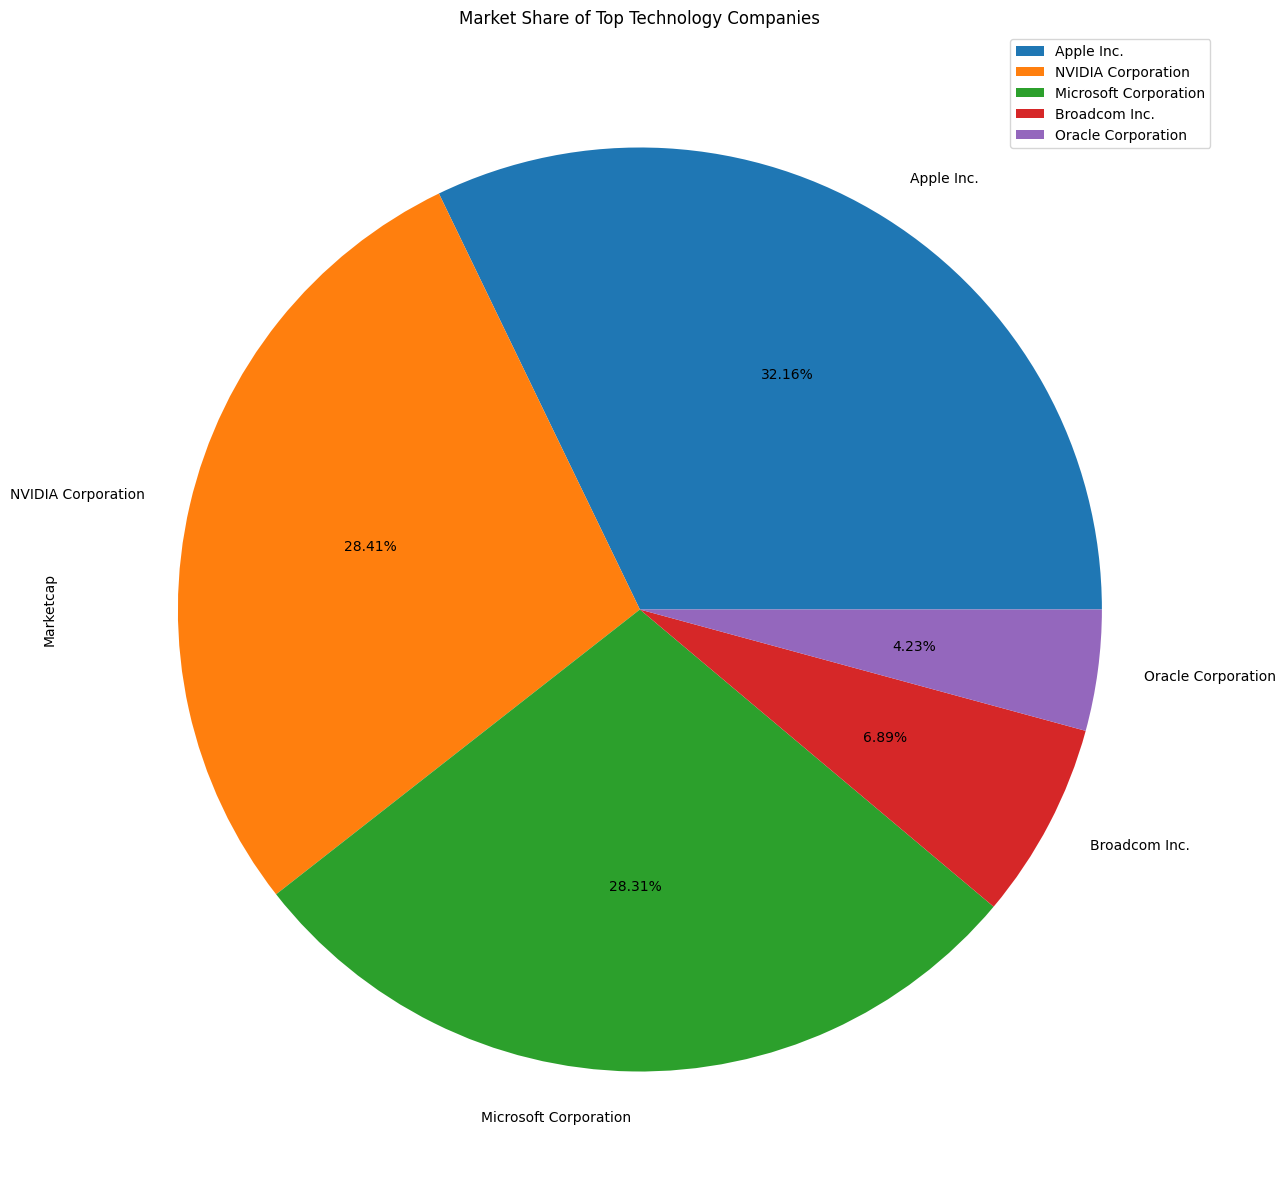

In [7]:
Tech_Market=df[df['Sector']=='Technology']
top_companies=Tech_Market.nlargest(5, 'Marketcap')
top_companies.plot(kind='pie',y='Marketcap',labels=top_companies['Shortname'], autopct='%2.2f%%', figsize=(15, 15), title="Market Share of Top Technology Companies")


XGBoost Model

In [8]:
X=df['Marketcap'].values.astype('int').reshape(-1, 1)
Y=df['Currentprice'].values.astype('int').reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)
n=50
params={
    'objective':'reg:squarederror',
    'max_depth':5,
    'learning_rate':0.1,
}

model=xgb.train(params=params, dtrain=xgb_train,num_boost_round=n)
prediction=model.predict(xgb_test)


mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

print(mse)
print(mae)


117472.08435869127
158.0658023773678
